In [ ]:
import pandas as pd
import datetime as dt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest=pd.read_csv("/content/Alberta_Smoke_Plume_Observation_Studyaccepted.csv", encoding='mac_roman').dropna()
features=[
          "Latitude",
"Longitude",
"Fire elevation",
"Fire report time",
"Reported fire size",
"Temperature",
"Relative humidity",
"Wind speed",
"Wind direction",
"24 hour precipitation",
]
forest=forest[features]

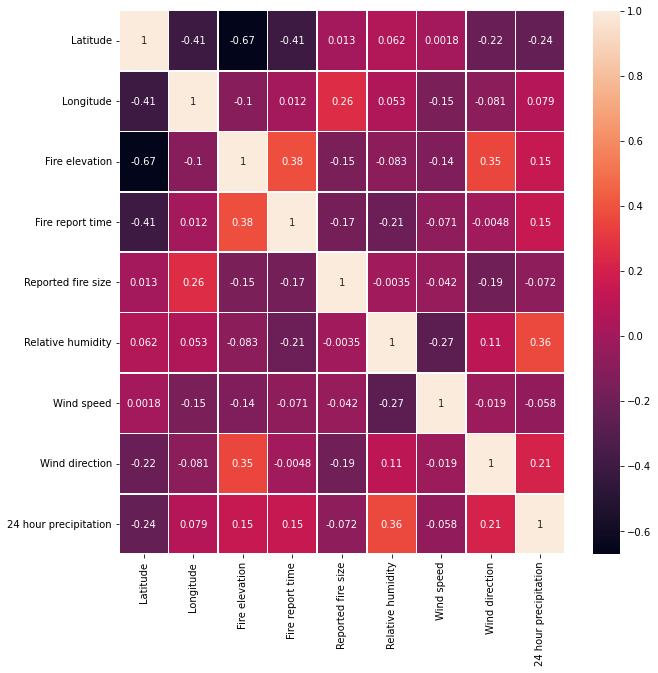

In [ ]:
features=[
          "Latitude",
"Longitude",
"Fire elevation",
"Fire report time",
"Reported fire size",
"Temperature",
"Relative humidity",
"Wind speed",
"Wind direction",
"24 hour precipitation",
]
forest=forest[features]
plt.figure(figsize=(10, 10))
sns.heatmap(forest.corr(),annot=True,linewidths=.5)

In [ ]:

list_of_FEATURES=[
                  "Latitude",
"Longitude",
"Fire elevation",
"Temperature",
"Relative humidity",
"Wind speed",
"Wind direction",
"24 hour precipitation",
]
outfeature=["Reported fire size"]
datasubset=forest
X=datasubset[list_of_FEATURES].iloc[1:]
X["Temperature"]=pd.to_numeric(X["Temperature"])
Y=datasubset[outfeature].iloc[1:]
Y=np.asarray(Y)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(Y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

---
**SVM Regression**
---

In [ ]:
from sklearn import svm

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(Xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
pred=regressor.predict(Xtest)

In [ ]:
MAE = mean_absolute_error(ytest , pred)
print("SVM Mean Absolute Error:",MAE)

SVM Mean Absolute Error: 0.2600877914843521


Text(0, 0.5, 'Scaled damage size in hectors')

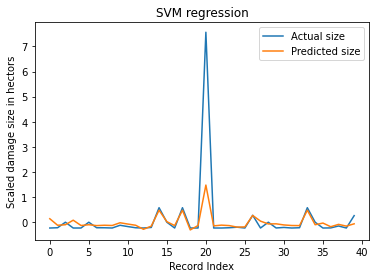

In [ ]:
plt.title("SVM regression")
plt.plot(range(len(ytest)),ytest.ravel(),label='Actual size')
plt.plot(range(len(ytest)),pred,label='Predicted size')
plt.legend(loc="upper right")
plt.xlabel("Record Index")
plt.ylabel("Scaled damage size in hectors")



---

# **Random forest regression**

In [ ]:
random_new = RandomForestRegressor(n_estimators = 373, min_samples_split = 3, min_samples_leaf = 1, max_features = 'sqrt',
                                       bootstrap = True)
random_new.fit(Xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(max_features='sqrt', min_samples_split=3,
                      n_estimators=373)

In [ ]:
random_model_accuracy = round(random_new.score(Xtest, ytest)*100,2)
print("Training accuracy",round(random_model_accuracy, 2), '%')
pred=random_new.predict(Xtest)
MAE = mean_absolute_error(ytest , pred)
print("Testing mean absolute error",MAE)


Training accuracy 92.22 %
Testing mean absolute error 0.14523657469240664


Text(0, 0.5, 'Scaled damage size in hectors')

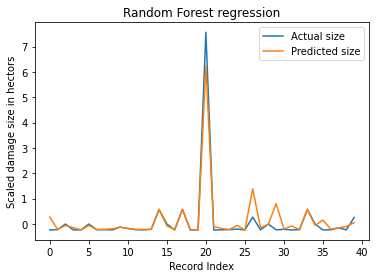

In [ ]:
plt.title("Random Forest regression")
plt.plot(range(len(ytest)),ytest.ravel(),label='Actual size')
plt.plot(range(len(ytest)),pred,label='Predicted size')
plt.legend(loc="upper right")
plt.xlabel("Record Index")
plt.ylabel("Scaled damage size in hectors")

---
# **XGBoost regression**



In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error 
XGBModel = XGBRegressor()

XGBModel.fit(Xtrain,ytrain , verbose=True)


[12:47:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(Xtest)
MAE = mean_absolute_error(ytest , XGBpredictions)
print('XGBoost regression testing MAE = ',MAE)


XGBoost regression testing MAE =  0.1338108490097662


Text(0, 0.5, 'Scaled damage size in hectors')

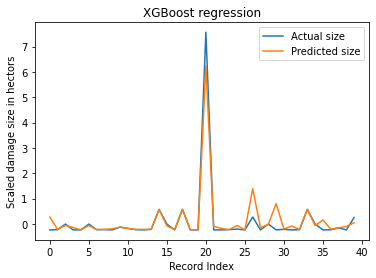

In [ ]:
plt.title("XGBoost regression")
plt.plot(range(len(ytest)),ytest.ravel(),label='Actual size')
plt.plot(range(len(ytest)),pred,label='Predicted size')
plt.legend(loc="upper right")
plt.xlabel("Record Index")
plt.ylabel("Scaled damage size in hectors")


---
# **KMeans Regression**



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error 

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(Xtrain,ytrain)
model.best_params_


{'n_neighbors': 9}

In [ ]:
model = neighbors.KNeighborsRegressor(n_neighbors = 7)

model.fit(Xtrain, ytrain)  #fit the model
pred=model.predict(Xtest)

In [ ]:
MAE = mean_absolute_error(ytest , pred)
print('KMeans regression testing MAE = ',MAE)

KMeans regression testing MAE =  0.24300848644811265


Text(0, 0.5, 'Scaled damage size in hectors')

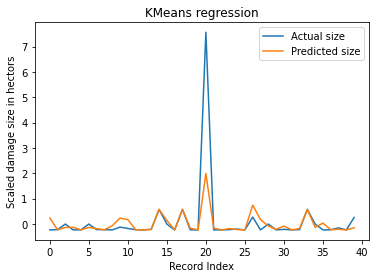

In [ ]:
plt.title("KMeans regression")
plt.plot(range(len(ytest)),ytest.ravel(),label='Actual size')
plt.plot(range(len(ytest)),pred,label='Predicted size')
plt.legend(loc="upper right")
plt.xlabel("Record Index")
plt.ylabel("Scaled damage size in hectors")